The notebook consists of exploratoty data analysis based on Breast Cancer Wisconsin diagnosis dataset.

Diagnosis denote (M = malignant, B = benign)
The features  computed for each cell nucleus include:

    1) radius (mean of distances from center to points on the perimeter)
    2) texture (standard deviation of gray-scale values)
    3) perimeter
    4) area
    5) smoothness (local variation in radius lengths)
    6) compactness (perimeter^2 / area - 1.0)
    7) concavity (severity of concave portions of the contour)
    8) concave points (number of concave portions of the contour)
    9) symmetry
    10)fractal dimension ("coastline approximation" - 1)

Later I shall use Logist regression SVM,Decision Trees algorithms to predict classification of the breast cancer diagnosis.

Looking forward to your feedback in the comment section also kindly UPVOTE and motivate a beginner here!!!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
#import and load dataset
data=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [4]:
#view the data in summary of top 5 rows with corresponding column names
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#drop ID column as it does not have a corrilation with dignosis which is what we want to classify
data.drop('id',axis=1,inplace=True)

# # # Data Exploration

In [6]:
#checking for how our data looks in an informative way
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
#vieweing the shape of our data set
data.shape

(569, 32)

In [8]:
#vieweing the data type distribution of our data set
data.dtypes.value_counts()

float64    31
object      1
dtype: int64

In [9]:
#viewing the column names inside our data
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

    Our data is composed of 31 columns and 569 rows.
    The dignosis column that we want to classify is of object data type.
    There is a column called unnamed with missing values (this needs to be removed)

In [10]:
#checking for missing values
data.isna().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [11]:
#drop unnamed column 
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [12]:
#our data now has no missing values
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
#Getting a statistical decription of our data 
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The description works for numerical data values to include diagnosis column values we wil need to transform from categorical to numerical values.Also known as label encoding.

Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created unlike hot encoding where each unique category variable has a new column.

The reason for us to use label encoding is that we only have two unique values for a categorical variable (M and B) representing Malignant and Benign for more than 2 unique categories it's advicable to use  one-hot encoding though it adds many coulmns in the event of many coulmns something to concider.

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
data['diagnosis_enc']=lbl_enc.fit_transform(data[['diagnosis']])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
#The new column name diagnosis_enc icludes encoded column values from the diagnosis column
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_enc
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# # # # #  Data Visualization

<AxesSubplot:>

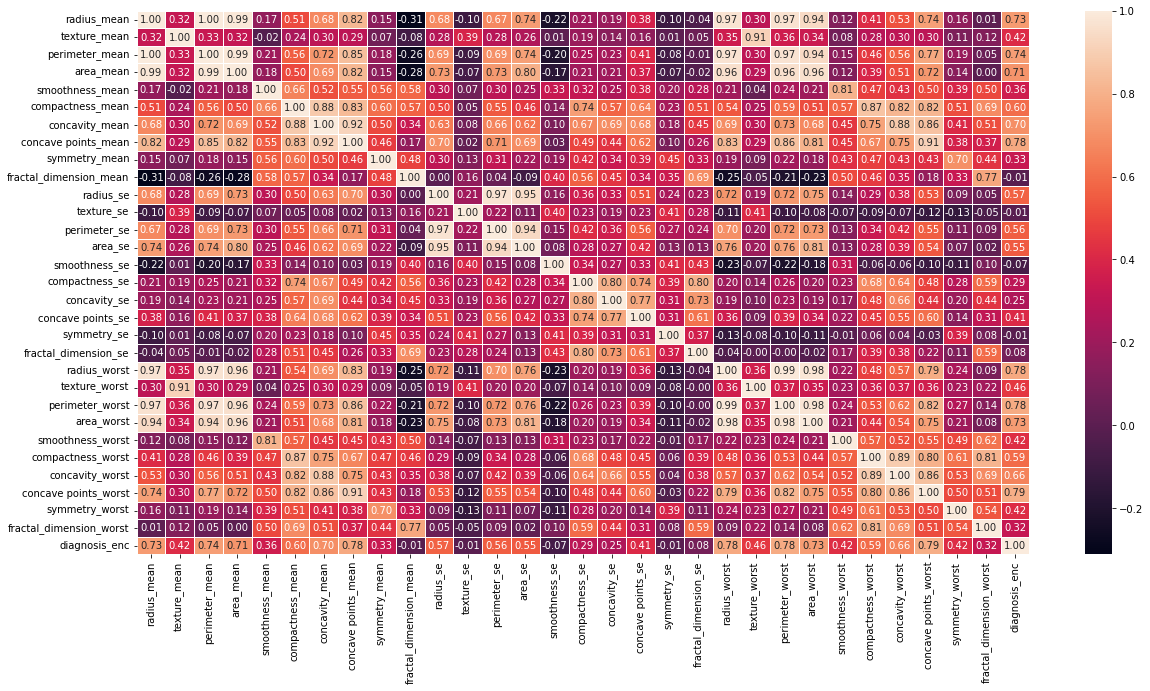

In [16]:
#Getting to view the corrilation on our data set
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, fmt=".2f",annot_kws={"size":10},linewidths=.7)

From the cells in the matrix the darker shades of the color indicate smaller values while brighter shades correspond to larger values near to 1.

From our correlation matrix where there is a large positive near to 1.0 it indicates a strong positive correlation.Meaning when a value of one of the variables increases, the value of the other variable will increase as well.

Where there is a negative value near to -1.0 it  indicates a strong negative correlation that means  the value of one variable will decreases with the increasing/decreasing of the other.

While a value near to 0 whether positive or negative indicates the absence of any correlation between the two variables they are  independent of each other.



In [17]:
#getting the correlation values  to our target variable - diagnosis_enc
cor_target=abs(data.corr()['diagnosis_enc'])

In [18]:
#view all the feature columns values with a correlation to diagnosis column
cor_target

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean     0.012838
radius_se                  0.567134
texture_se                 0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se              0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se                0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

In [19]:
#filtering features that have a strong correlation to our target column i.e >5
cor_target[cor_target>0.5]

radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
diagnosis_enc           1.000000
Name: diagnosis_enc, dtype: float64

In [20]:
feature_cols=data[['radius_mean','perimeter_mean','area_mean','compactness_mean',
                'concavity_mean','concave points_mean','radius_se','perimeter_se','area_se','radius_worst',
                'perimeter_worst','area_worst','compactness_worst','concave points_worst','diagnosis_enc','diagnosis']]

This usally forms a good way in determining the features to use in our feature engineering to give a good result from our models.

<AxesSubplot:>

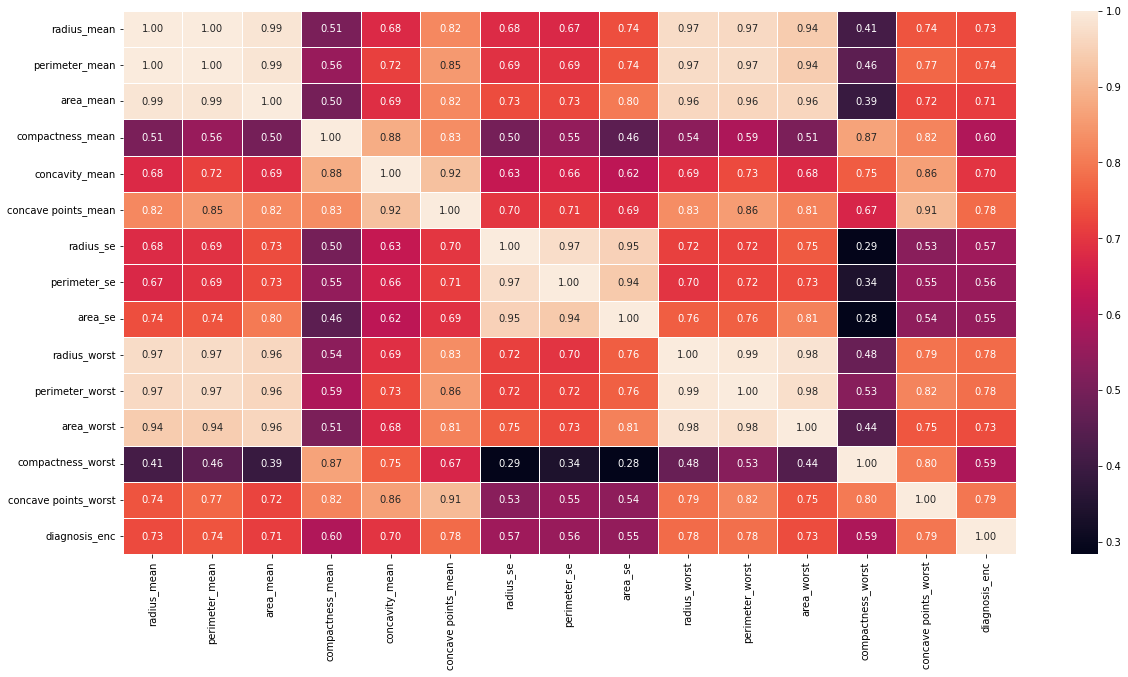

In [21]:

#in plotting the heatmap to see how the features corrilate to each other 
plt.figure(figsize=(20,10))
sns.heatmap(feature_cols.corr(),annot=True,fmt=".2f", annot_kws={"size":10},linewidths=.7)

    Here we find plot the columns with the strongest correlation greater than 0.5 based on our target           column(diagnosis_enc )to see how they relate with each other.
    
    Worth also noting is the compactness_worst column has less positive correlation less than 0.5 to other feauters apart from columns compactness_mean,concavity_mean,concave points_mean and perimeter_worst.Later we can see if this feature has an impact in our overall result to our model based on this.



# # # # # Distribution of our Target column

In [22]:
#get to view our our diagnosis column values are distributed
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

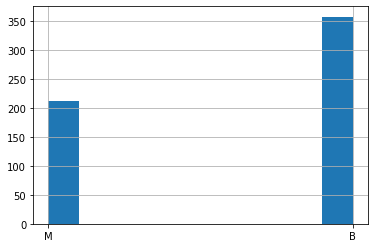

In [23]:
#plotting the distribution on an histogram
data.diagnosis.hist()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


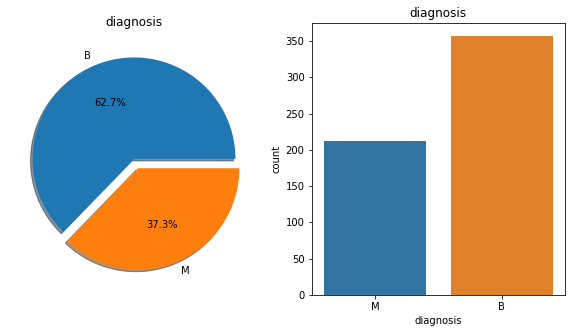

In [24]:
#plotting subplots of our target column
f,ax=plt.subplots(1,2,figsize=(10,5))
data['diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis',data=data,ax=ax[1])
ax[1].set_title('diagnosis')
plt.show()

We have breast cancer type of Benign with 357 outcomes and Malignant type with 212 outcomes from our data.


# # #  #plotting different cell features in relation to the diagnosis type

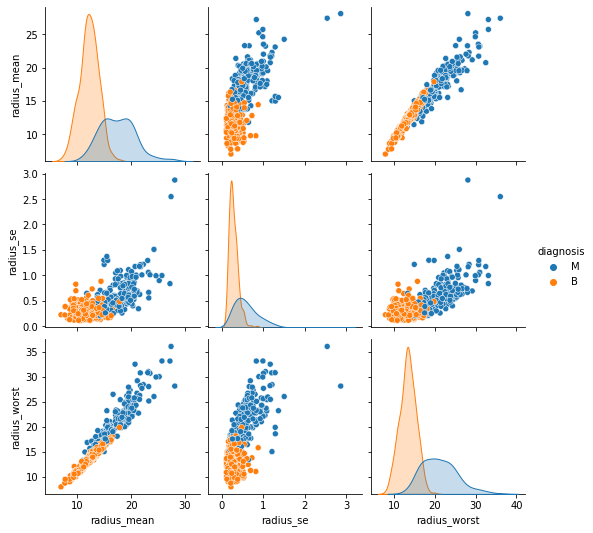

In [25]:
#plotting radius features of the cell in relation to  the diagnosis type
sns.pairplot(feature_cols[['radius_mean','radius_se','radius_worst','diagnosis']],hue='diagnosis')

In comparing the features of radius_mean in relation to the diagnosis type we see that Benign type has the highest number of radius_mean values.

When it comes to radius_se there are two value outliers in our malignant value as most values fall below 2.0 value.

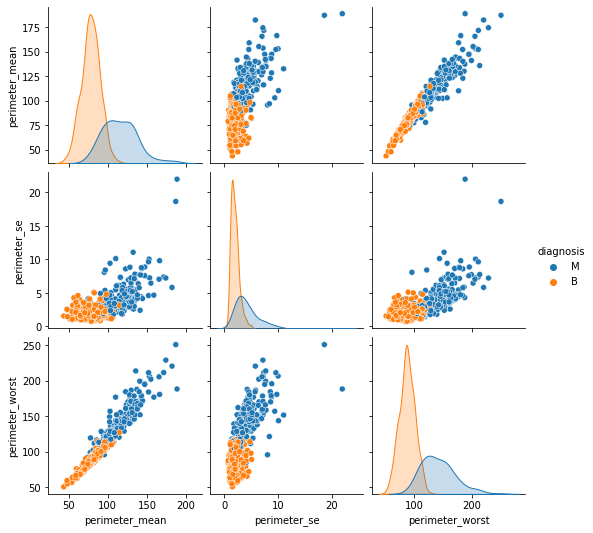

In [26]:
#features related to perimeter in relation to the diagnosis type
sns.pairplot(feature_cols[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']],hue='diagnosis')

There are two value outliers in our perimeter_se with malignant values

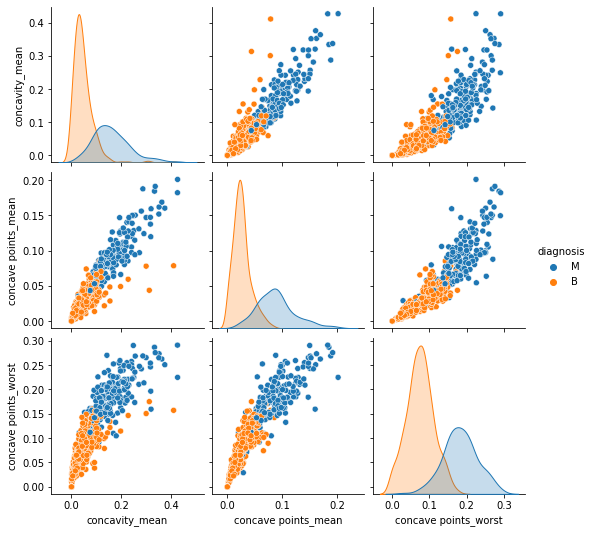

In [27]:
#features related to concave and concativity
sns.pairplot(feature_cols[['concavity_mean','concave points_mean','concave points_worst','diagnosis']],hue='diagnosis')

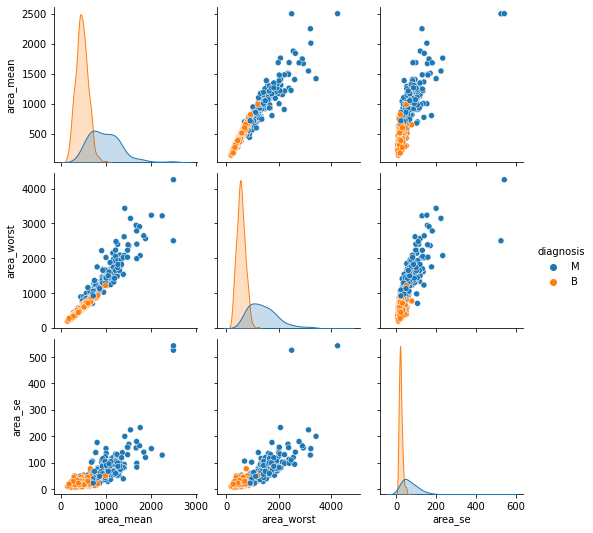

In [28]:
#features related to area in relation to the diagnosis type
sns.pairplot(feature_cols[['area_mean','area_worst','area_se','diagnosis']],hue='diagnosis')

# # # #  Model Building 

# # # # # # 1) Logistic Regression

In [29]:
#instanciate LogisticRegression
logreg=LogisticRegression(solver='liblinear')

In [30]:
#We shall use our feature cols data set as it showed the columns values with strong correlation to our output variable. 
feature_cols.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concave points_worst', 'diagnosis_enc',
       'diagnosis'],
      dtype='object')

# # # # # # 2) Define Feature and outcome variables

In [31]:
#creating our X feature variables and y outcome variable
X= feature_cols.drop('diagnosis',axis=1)
y=feature_cols['diagnosis_enc']

# # # # # # 3) Splitting our data

In [32]:
#splitting our data into training and testing data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# # # # # #4) Model Training on data

In [33]:
#fitting our training dataset
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

# # # # # 5) Model prediction on data

In [34]:
#using our model to predict our testing values and training values
pred=logreg.predict(X_test)
train=logreg.predict(X_train)

# # # # # 6)Model Evaluation

In [35]:
#evaluating our model with data some training data
accuracy_score(y_train,train)

1.0

    It returns a score of 1.0 .The best score is because we are evaluating it with data it's trained on.
    The true measure should be on data it has not seen (Testing data)

In [36]:
#evaluating our model with data some testing data
accuracy_score(y_test,pred)

0.9912280701754386

# # # # # Findings

Our Logistic regression model returns a score of 0.99 . Which shows our model does a great job in categorizing the diagnosis of breast cancer types.From the EDA it shows that most of features in our  dataset were linearly separable hence why the high accuracy score.

Later I shall work on Support Vector Machine Algorithm and see how it fairs compared to logistc regression 